# MULTIPLE LINEAR REGRESSION


In [1]:
#for visualisation and data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#for ML model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_excel('Task 2 ML Data.xlsx',sheet_name='Sheet1')
df.head()

,Date,NO2,CO,O3,PM2.5,SO2,Air_Quality,WIND,TEMP,PRESSURE,RH
0,2010-01-01,38.16,0.704,0.03348,13.526531,7.7,54,5.854167,46.000000,1030.041667,65.916667
1,2010-01-02,37.10,0.880,0.03996,14.953061,14.7,57,2.970833,44.000000,1028.208333,63.291667
2,2010-01-03,38.16,0.440,0.02484,15.428571,21.7,58,3.579167,44.041667,1025.833333,69.625000
3,2010-01-04,26.50,0.440,0.03348,10.800000,32.9,47,6.891667,41.750000,1031.208333,60.166667
4,2010-01-05,45.58,0.616,0.03348,15.904082,34.3,59,2.233333,37.333333,1032.125000,59.916667


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   NO2          365 non-null    float64       
 2   CO           365 non-null    float64       
 3   O3           365 non-null    float64       
 4   PM2.5        365 non-null    float64       
 5   SO2          365 non-null    float64       
 6   Air_Quality  365 non-null    int64         
 7   WIND         365 non-null    float64       
 8   TEMP         365 non-null    float64       
 9   PRESSURE     365 non-null    float64       
 10  RH           365 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 31.5 KB


In [5]:
df.describe()

,NO2,CO,O3,PM2.5,SO2,Air_Quality,WIND,TEMP,PRESSURE,RH
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,34.949008,0.506301,0.046087,13.626266,13.476947,63.747945,4.538818,68.747160,1016.835502,67.835502
std,16.596962,0.294035,0.016503,4.748510,11.535875,28.919593,1.903770,14.415286,5.656928,11.991668
min,7.420000,0.176000,0.015120,4.560000,0.000000,25.000000,1.204167,28.125000,1000.666667,24.458333
25%,22.260000,0.264000,0.034560,10.320000,4.900000,45.000000,3.008333,57.375000,1013.416667,62.416667
50%,31.800000,0.440000,0.043200,13.051020,9.800000,56.000000,4.145833,71.250000,1016.250000,69.041667
75%,44.520000,0.528000,0.054000,16.379592,18.900000,67.000000,5.716667,81.583333,1020.083333,75.500000
max,111.571429,1.760000,0.096857,34.924490,72.612245,179.000000,11.883333,89.125000,1038.208333,92.458333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241AF349988>,
      dtype=object)

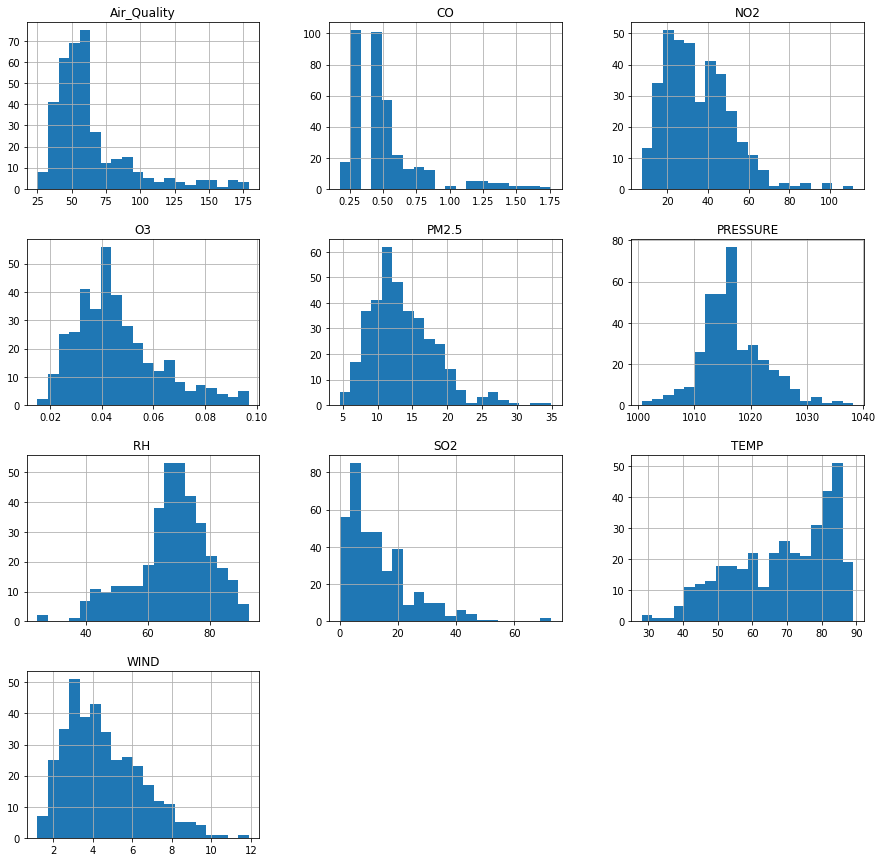

In [6]:
#histogram to see the distribution and inconsistency
df.hist(figsize=(15,15),bins=20)

### Feature Selection

In [7]:
#correlation
df.corr()

,NO2,CO,O3,PM2.5,SO2,Air_Quality,WIND,TEMP,PRESSURE,RH
NO2,1.000000,0.604258,0.399728,0.150477,0.353760,0.373292,-0.316142,-0.440287,0.301002,-0.406800
CO,0.604258,1.000000,0.173478,0.226181,0.249409,0.184298,-0.376012,-0.322150,0.261251,-0.180713
O3,0.399728,0.173478,1.000000,0.305914,0.180373,0.790639,-0.397071,0.226341,-0.068627,-0.409555
PM2.5,0.150477,0.226181,0.305914,1.000000,0.146086,0.590689,-0.324576,0.125795,0.018567,0.006034
SO2,0.353760,0.249409,0.180373,0.146086,1.000000,0.205725,-0.189428,-0.293679,0.189862,-0.168953
Air_Quality,0.373292,0.184298,0.790639,0.590689,0.205725,1.000000,-0.427784,0.189282,-0.039216,-0.289967
WIND,-0.316142,-0.376012,-0.397071,-0.324576,-0.189428,-0.427784,1.000000,-0.254101,-0.120439,0.080265
TEMP,-0.440287,-0.322150,0.226341,0.125795,-0.293679,0.189282,-0.254101,1.000000,-0.601621,0.123477
PRESSURE,0.301002,0.261251,-0.068627,0.018567,0.189862,-0.039216,-0.120439,-0.601621,1.000000,-0.272483
RH,-0.406800,-0.180713,-0.409555,0.006034,-0.168953,-0.289967,0.080265,0.123477,-0.272483,1.000000


### Training and Testing

In [8]:
#assigning independent and dependent variables
# x = independent variables
# y = dependent variable

x = df[['CO','O3','PM2.5','SO2']].values      #all the dependent variables
y = df['Air_Quality'].values                  #output variable

In [9]:
#splitting the training and testing data in 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [10]:
#training the model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# coefficients of MLR
coeff = mlr.coef_
c1 = coeff[0]
c2 = coeff[1]
c3 = coeff[2]
c4 = coeff[3]
print('The coefficient c1 =',c1)
print('The coefficient c2 =',c2)
print('The coefficient c3 =',c3)
print('The coefficient c4 =',c4)

The coefficient c1 = -3.774762110417575
The coefficient c2 = 1147.020451285624
The coefficient c3 = 2.3870115724145173
The coefficient c4 = 0.040957092430238276


In [12]:
#intercept of mlr
i = mlr.intercept_
print("The intercept of MLR =",i)

The intercept of MLR = -20.186681748023283


In [13]:
# TESTING - calculating predicted values
y_pred = mlr.predict(x_test)
print(y_pred)

[ 96.41218631  64.38517081  43.42802991  70.69187974  51.74897483
  38.19462318  63.13742993  69.45533345  79.10586687  39.26980549
  84.48528751  27.56302531  58.75826672  68.94873294  44.2537307
  66.32634251  62.84874294  87.36706753  98.81748247  36.71436617
  58.17496183  35.51044151  51.27688552  54.89629097  91.1173431
  62.55628552  62.5221576   41.84751973  68.38702847  57.07366624
 109.68280216  77.31689646  61.35166157  56.97333575  46.68083469
  61.86221204  49.59979233  54.69566737  51.27244473  90.42806275
  76.7547092   65.76259947  96.70129422  52.47834639  60.76740381
  37.55128405 119.6329627  125.19695729  60.97333696  82.3688016
  63.89778141  49.50192192  98.58187164  38.55215861 106.72087806
  61.57241767  27.83702252  77.27587499  64.31607591  70.0590989
  31.11387373  96.61258777  35.86664425  79.09290954  35.76662108
  52.5798204   54.89401745 122.17529281  32.22177809  83.27593045
  64.49132904  59.37496084  62.38847619]


In [14]:
#comparing the values in a dataframe
comp = pd.DataFrame({'Actual Value (y_test)':y_test,'Predicted Value (y_pred)':y_pred})
comp.tail()      #looking last 5 values

,Actual Value (y_test),Predicted Value (y_pred)
68,37,32.221778
69,87,83.275930
70,71,64.491329
71,46,59.374961
72,50,62.388476


## Evaluating the Model

### 1. Correlation

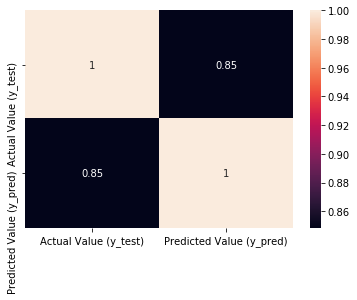

In [15]:
sns.heatmap(comp.corr(),annot=True)

### 2. MSE, RMSE, MAE and R2 Score evaluation

In [16]:
print('Mean Squared Error is :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error is :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error is :',metrics.mean_absolute_error(y_test, y_pred)) 
print('R-2 Score is :', metrics.r2_score(y_test, y_pred))

Mean Squared Error is : 258.95990327100117
Root Mean Squared Error is : 16.092231146457014
Mean Absolute Error is : 11.18096064852346
R-2 Score is : 0.711565307900207


### 3. Regression Plot

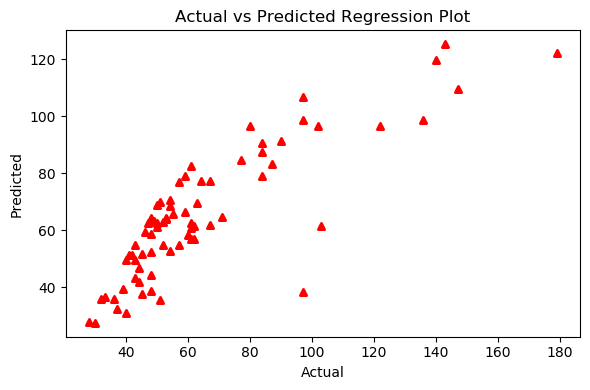

In [21]:
plt.figure(dpi=100)
plt.scatter(y_test, y_pred, c ="red",linewidths = 2,marker ="^",edgecolor ="red",s = 20)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Regression Plot')
plt.tight_layout()
plt.show()

